In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../data/data.csv')

# Handle missing values for numerical columns by imputing with the mean
numerical_cols = ['Amount', 'Value']
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Handle missing values for categorical columns by imputing with the mode
categorical_cols = ['ProductCategory', 'ChannelId']
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Verify missing values are handled
print("Missing Values:\n", df.isnull().sum())

# Display basic information about the dataset
df.info()


Missing Values:
 TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-

In [3]:
# Summary statistics for numerical columns
print("Summary Statistics (Numerical):\n", df.describe())

# Summary statistics for categorical columns
print("Summary Statistics (Categorical):\n", df.describe(include='object'))


Summary Statistics (Numerical):
        CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000
Summary Statistics (Categorical):
               TransactionId        BatchId       AccountId  \
count                 95662          95662           95662   
unique                95662          94809            3633   
top     TransactionId_76871  BatchId_67019  

In [4]:
# Display the first few rows of the dataset
print(df.head())

# Check for unique values in 'Amount' and 'Value' columns
print(df['Amount'].unique())
print(df['Value'].unique())


         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
0  CustomerId_4406          UGX          256  ProviderId_6  ProductId_10   
1  CustomerId_4406          UGX          256  ProviderId_4   ProductId_6   
2  CustomerId_4683          UGX          256  ProviderId_6   ProductId_1   
3   CustomerId_988          UGX          256  ProviderId_1  ProductId_21   
4   CustomerId_988          UGX          256  ProviderId_4   ProductId_6   

      ProductCategory    ChannelId   Amount  Value  TransactionStart

In [5]:
# Check for missing values in 'Amount' and 'Value'
print("Missing values in 'Amount':", df['Amount'].isnull().sum())
print("Missing values in 'Value':", df['Value'].isnull().sum())




Missing values in 'Amount': 0
Missing values in 'Value': 0


In [6]:
# Display sample values for 'Amount' and 'Value'
print(df[['Amount', 'Value']].sample(10))


        Amount  Value
50355  10000.0  10000
72811   1500.0   1500
80948  10000.0  10000
90094  10000.0  10000
6025   -5000.0   5000
92458  26000.0  26000
65079    -50.0     50
57071  10000.0  10000
5977   -1000.0   1000
74739   5000.0   5000


In [7]:
# Convert 'Amount' and 'Value' to numeric (if not already)
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# Check data types
print(df.dtypes)


TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object


In [8]:
# Check for non-empty values in 'Amount' and 'Value'
print("Non-empty 'Amount' values:\n", df['Amount'].dropna().head(10))
print("Non-empty 'Value' values:\n", df['Value'].dropna().head(10))


Non-empty 'Amount' values:
 0     1000.0
1      -20.0
2      500.0
3    20000.0
4     -644.0
5     2000.0
6    10000.0
7     -500.0
8      500.0
9      600.0
Name: Amount, dtype: float64
Non-empty 'Value' values:
 0     1000
1       20
2      500
3    21800
4      644
5     2000
6    10000
7      500
8      500
9      600
Name: Value, dtype: int64


Values and Frequencies for 'Amount':
Value: -1000000.0, Frequency: 2
Value: -900000.0, Frequency: 1
Value: -500000.0, Frequency: 3
Value: -200000.0, Frequency: 8
Value: -160000.0, Frequency: 2
Value: -150000.0, Frequency: 4
Value: -115000.0, Frequency: 3
Value: -110000.0, Frequency: 6
Value: -100000.0, Frequency: 34
Value: -90000.0, Frequency: 2
Value: -85000.0, Frequency: 12
Value: -75000.0, Frequency: 4
Value: -70000.0, Frequency: 7
Value: -60000.0, Frequency: 41
Value: -55000.0, Frequency: 19
Value: -50000.0, Frequency: 102
Value: -40000.0, Frequency: 176
Value: -37878.0, Frequency: 1
Value: -35000.0, Frequency: 45
Value: -33900.0, Frequency: 1
Value: -31400.0, Frequency: 1
Value: -30000.0, Frequency: 754
Value: -28000.0, Frequency: 1
Value: -26000.0, Frequency: 1
Value: -25000.0, Frequency: 1970
Value: -24000.0, Frequency: 6
Value: -21000.0, Frequency: 1
Value: -20000.0, Frequency: 249
Value: -18000.0, Frequency: 3
Value: -15000.0, Frequency: 303
Value: -14999.0, Frequency: 1
Value

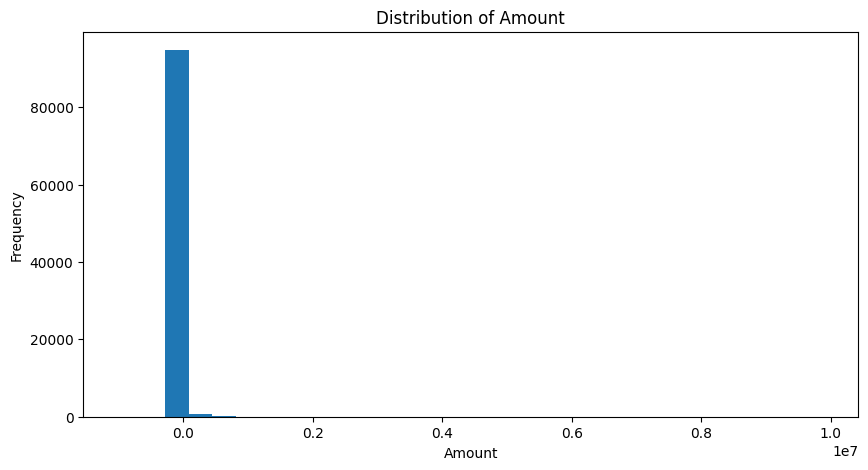

Values and Frequencies for 'Value':
Value: 2, Frequency: 7
Value: 3, Frequency: 7
Value: 4, Frequency: 9
Value: 5, Frequency: 17
Value: 6, Frequency: 20
Value: 7, Frequency: 9
Value: 8, Frequency: 25
Value: 9, Frequency: 3
Value: 10, Frequency: 1034
Value: 11, Frequency: 7
Value: 12, Frequency: 50
Value: 13, Frequency: 18
Value: 14, Frequency: 47
Value: 15, Frequency: 33
Value: 16, Frequency: 27
Value: 17, Frequency: 15
Value: 18, Frequency: 99
Value: 19, Frequency: 6
Value: 20, Frequency: 2615
Value: 21, Frequency: 5
Value: 22, Frequency: 31
Value: 23, Frequency: 3
Value: 24, Frequency: 28
Value: 25, Frequency: 2008
Value: 26, Frequency: 28
Value: 27, Frequency: 7
Value: 28, Frequency: 19
Value: 29, Frequency: 2
Value: 30, Frequency: 464
Value: 31, Frequency: 3
Value: 32, Frequency: 35
Value: 33, Frequency: 5
Value: 34, Frequency: 2
Value: 35, Frequency: 69
Value: 36, Frequency: 17
Value: 37, Frequency: 1
Value: 38, Frequency: 12
Value: 39, Frequency: 5
Value: 40, Frequency: 1200
Valu

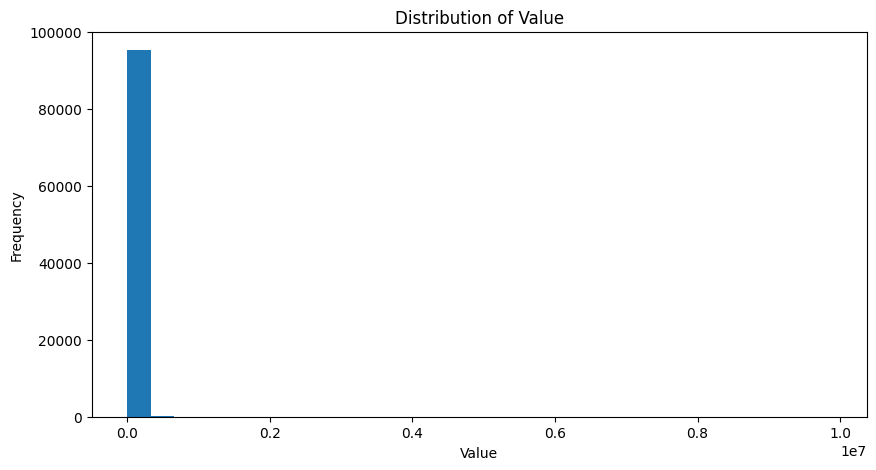

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Check if the columns have non-empty values
if df['Amount'].notna().any():
    # Print values and frequencies for 'Amount'
    amount_values, amount_freqs = np.unique(df['Amount'].dropna(), return_counts=True)
    print("Values and Frequencies for 'Amount':")
    for value, freq in zip(amount_values, amount_freqs):
        print(f"Value: {value}, Frequency: {freq}")
    
    # Histogram plot for 'Amount' using different method
    plt.figure(figsize=(10, 5))
    plt.hist(df['Amount'].dropna(), bins=30)
    plt.title('Distribution of Amount')
    plt.xlabel('Amount')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("The 'Amount' column contains only empty or NaN values.")

if df['Value'].notna().any():
    # Print values and frequencies for 'Value'
    value_values, value_freqs = np.unique(df['Value'].dropna(), return_counts=True)
    print("Values and Frequencies for 'Value':")
    for value, freq in zip(value_values, value_freqs):
        print(f"Value: {value}, Frequency: {freq}")
    
    # Histogram plot for 'Value' using different method
    plt.figure(figsize=(10, 5))
    plt.hist(df['Value'].dropna(), bins=30)
    plt.title('Distribution of Value')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("The 'Value' column contains only empty or NaN values.")



In [10]:
# Summary statistics for 'Amount'
amount_summary = df['Amount'].describe()
print("Summary Statistics for 'Amount':\n", amount_summary)

# Summary statistics for 'Value'
value_summary = df['Value'].describe()
print("Summary Statistics for 'Value':\n", value_summary)


Summary Statistics for 'Amount':
 count    9.566200e+04
mean     6.717846e+03
std      1.233068e+05
min     -1.000000e+06
25%     -5.000000e+01
50%      1.000000e+03
75%      2.800000e+03
max      9.880000e+06
Name: Amount, dtype: float64
Summary Statistics for 'Value':
 count    9.566200e+04
mean     9.900584e+03
std      1.231221e+05
min      2.000000e+00
25%      2.750000e+02
50%      1.000000e+03
75%      5.000000e+03
max      9.880000e+06
Name: Value, dtype: float64


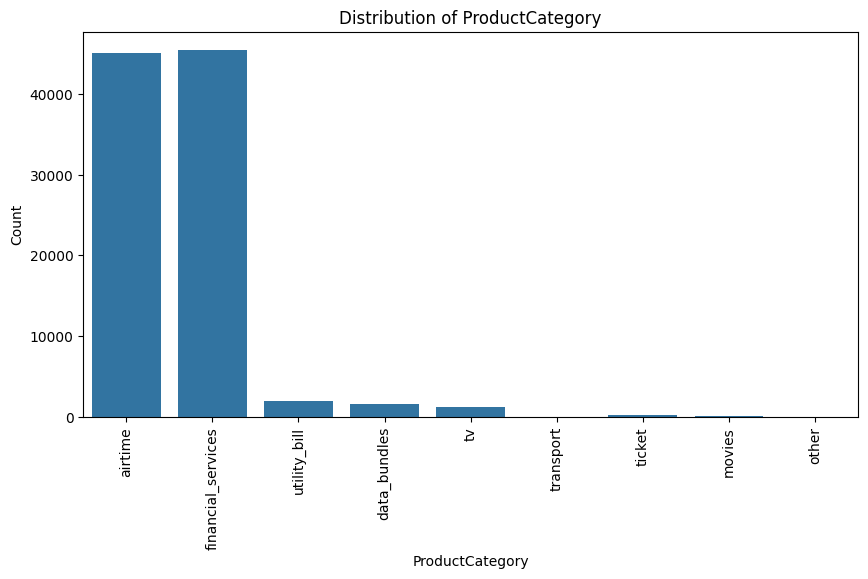

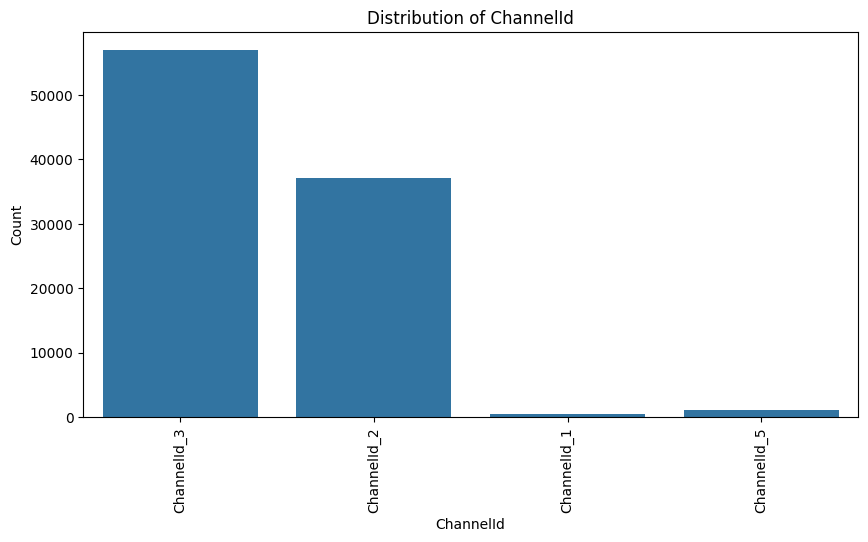

In [11]:
# Bar chart for 'ProductCategory'
plt.figure(figsize=(10, 5))
sns.countplot(x='ProductCategory', data=df)
plt.title('Distribution of ProductCategory')
plt.xlabel('ProductCategory')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Bar chart for 'ChannelId'
plt.figure(figsize=(10, 5))
sns.countplot(x='ChannelId', data=df)
plt.title('Distribution of ChannelId')
plt.xlabel('ChannelId')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


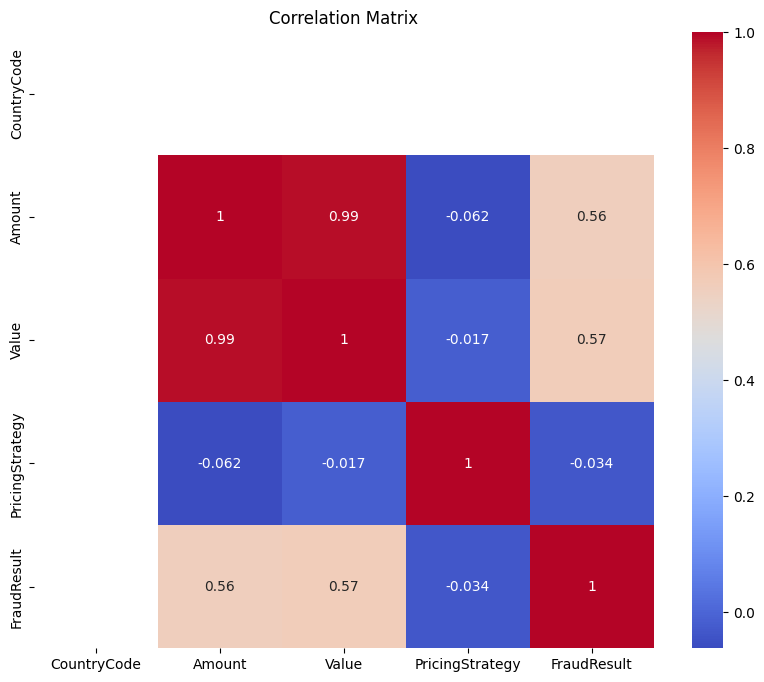

In [12]:
# Correlation matrix
corr_matrix = df.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [13]:
# Identify missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Example: Impute missing values with the mean for numerical columns
df['Amount'].fillna(df['Amount'].mean(), inplace=True)
df['Value'].fillna(df['Value'].mean(), inplace=True)

# For categorical columns, impute with the mode
df['ProductCategory'].fillna(df['ProductCategory'].mode()[0], inplace=True)
df['ChannelId'].fillna(df['ChannelId'].mode()[0], inplace=True)


Missing Values:
 TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64


In [14]:

import numpy as np

# Function to identify outliers
def identify_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return lower_bound, upper_bound, outliers

# Identify outliers for 'Amount'
amount_data = df['Amount'].dropna()
amount_lower_bound, amount_upper_bound, amount_outliers = identify_outliers(amount_data)
print(f"Amount Lower Bound: {amount_lower_bound}")
print(f"Amount Upper Bound: {amount_upper_bound}")
print(f"Amount Outliers:\n{amount_outliers}")

# Box plot for 'Amount' with outliers highlighted
plt.figure(figsize=(10, 5))
sns.boxplot(x=amount_data)
plt.title('Box Plot of Amount')
plt.xlabel('Amount')
plt.show()

# Identify outliers for 'Value'
value_data = df['Value'].dropna()
value_lower_bound, value_upper_bound, value_outliers = identify_outliers(value_data)
print(f"Value Lower Bound: {value_lower_bound}")
print(f"Value Upper Bound: {value_upper_bound}")
print(f"Value Outliers:\n{value_outliers}")

# Box plot for 'Value' with outliers highlighted
plt.figure(figsize=(10, 5))
sns.boxplot(x=value_data)
plt.title('Box Plot of Value')
plt.xlabel('Value')
plt.show()



SyntaxError: invalid syntax (2704749860.py, line 13)